# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk



nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger',
               'stopwords'])

[nltk_data] Downloading package punkt to /home/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lucas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lucas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load messages dataset
messages = pd.read_csv('disaster_messages.csv')
messages = messages.drop(columns='original')
messages.head()

,id,message,genre
0,2,Weather update - a cold front from Cuba that c...,direct
1,7,Is the Hurricane over or is it not over,direct
2,8,Looking for someone but no name,direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",direct


In [3]:
messages.isnull().sum()

id         0
message    0
genre      0
dtype: int64

In [4]:
# load categories dataset
categories = pd.read_csv('disaster_categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [5]:
categories.isnull().sum()

id            0
categories    0
dtype: int64

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [6]:
# merge datasets
df = pd.merge(right=categories, left=messages, how='inner', on='id')
df.head()

,id,message,genre,categories
0,2,Weather update - a cold front from Cuba that c...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",direct,related-1;request-0;offer-0;aid_related-0;medi...


In [7]:
df.shape

(26386, 4)

In [8]:
df.isnull().sum()

id            0
message       0
genre         0
categories    0
dtype: int64

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [9]:
# create a dataframe of the 36 individual category columns
categories = categories['categories'].str.split(';', -1, True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [10]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x.split('-')[0])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [11]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [12]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].apply(lambda x: x[-1])
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [13]:
# drop the original categories column from `df`
df = df.drop(columns=['categories'])

df.head()

,id,message,genre
0,2,Weather update - a cold front from Cuba that c...,direct
1,7,Is the Hurricane over or is it not over,direct
2,8,Looking for someone but no name,direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",direct


In [14]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)
df.head()

,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,direct,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.isnull().sum()

id                          0
message                     0
genre                       0
related                   138
request                   138
offer                     138
aid_related               138
medical_help              138
medical_products          138
search_and_rescue         138
security                  138
military                  138
child_alone               138
water                     138
food                      138
shelter                   138
clothing                  138
money                     138
missing_people            138
refugees                  138
death                     138
other_aid                 138
infrastructure_related    138
transport                 138
buildings                 138
electricity               138
tools                     138
hospitals                 138
shops                     138
aid_centers               138
other_infrastructure      138
weather_related           138
floods                    138
storm     

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [16]:
# check number of duplicates
df.duplicated().sum()

41

In [17]:
# drop duplicates
df = df.drop_duplicates()

In [18]:
# check number of duplicates
df.duplicated().sum()

0

In [19]:
df.head()

,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,direct,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
(df.drop(columns=['message', 'genre']) > 1).sum()

id                        26345
related                     192
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_infrastructure          0
weather_related               0
floods                        0
storm   

In [21]:
df['related'].unique()

array([ 1.,  0.,  2., nan])

since i do not know the meaning of label "2", i will drop these rows, since they are just a few.

In [22]:
df = df[df['related'] < 2]

In [23]:
(df.drop(columns=['message', 'genre']) > 1).sum()

id                        26015
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_infrastructure          0
weather_related               0
floods                        0
storm   

In [24]:
df = df.dropna()

In [25]:
df.shape

(26015, 39)

drop messages that are too long

In [26]:
messages_lens = np.array([len(i.split(' ')) for i in df['message']])
x = np.linspace(1, 200, 100)
cdf = np.array([np.mean(messages_lens < i) for i in x])
len_lim = np.ceil(x[cdf > .99][0])
df = df.iloc[messages_lens <= len_lim]
df.shape

(25789, 39)

### 7. Save the clean dataset into a sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [27]:
engine = create_engine('sqlite:///InsertDatabaseName.db')
df.to_sql('InsertTableName', engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

# Visuals

(array([1098, 6195, 6241, 4682, 3860, 2124,  854,  416,  202,  117]), array([ 1. ,  7.7, 14.4, 21.1, 27.8, 34.5, 41.2, 47.9, 54.6, 61.3, 68. ]))


(array([1098., 6195., 6241., 4682., 3860., 2124.,  854.,  416.,  202.,
         117.]),
 array([ 1. ,  7.7, 14.4, 21.1, 27.8, 34.5, 41.2, 47.9, 54.6, 61.3, 68. ]),
 <BarContainer object of 10 artists>)

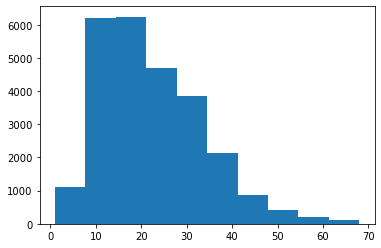

In [28]:
messages_lens = np.array([len(i.split(' ')) for i in df['message']])
print(np.histogram(messages_lens))
plt.hist(messages_lens)

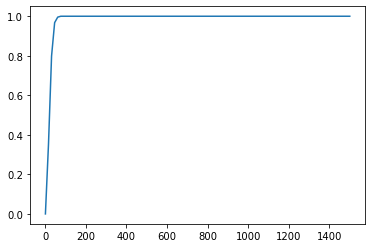

In [29]:
x = np.linspace(1, 1500, 100)
cdf = [np.mean(messages_lens < i) for i in x]
plt.plot(x, cdf)

[57.28282828 59.29292929 61.3030303  63.31313131 65.32323232]


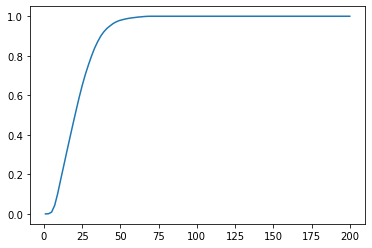

In [30]:
x = np.linspace(1, 200, 100)
cdf = np.array([np.mean(messages_lens < i) for i in x])
print(x[cdf > .99][:5])
plt.plot(x, cdf)

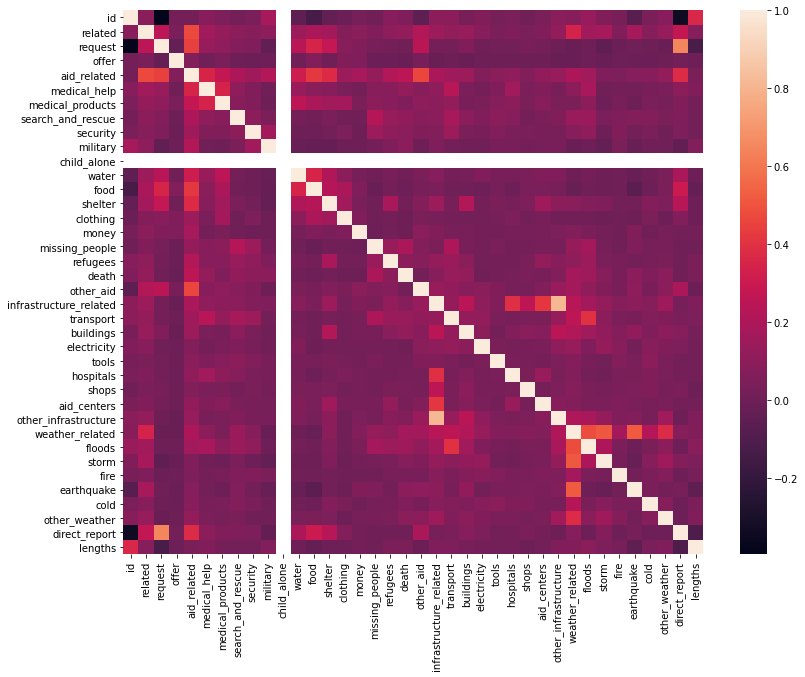

In [31]:
df['lengths'] = messages_lens.astype(float)
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr())
plt.show()

In [32]:
from nltk.corpus import stopwords


def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()    
    stop_words = list(stopwords.words('english')) #About 150 stopwords    

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        if clean_tok.isalpha() and clean_tok not in stop_words:            
            clean_tokens.append(clean_tok)

    return clean_tokens    

In [33]:
tokens = []
for i in df['message']:
    tokens += tokenize(i)
# print(np.histogram(tokens))
# plt.hist(tokens)

In [34]:
print(tokens[:10])
print(len(set(tokens)))

['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti', 'hurricane', 'looking']
28097


In [35]:
df['message'][:10]

0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2                      Looking for someone but no name
3    UN reports Leogane 80-90 destroyed. Only Hospi...
4    says: west side of Haiti, rest of the country ...
5               Information about the National Palace-
6                       Storm at sacred heart of jesus
7    Please, we need tents and water. We are in Sil...
8      I would like to receive the messages, thank you
9    I am in Croix-des-Bouquets. We have health iss...
Name: message, dtype: object

In [36]:
from nltk import ngrams, FreqDist
all_counts = FreqDist(ngrams(tokens, 1))

In [37]:
all_counts.most_common(20)

[(('people',), 2756),
 (('food',), 2701),
 (('water',), 2691),
 (('help',), 2539),
 (('need',), 2382),
 (('ha',), 2181),
 (('please',), 1964),
 (('earthquake',), 1808),
 (('area',), 1507),
 (('like',), 1478),
 (('wa',), 1448),
 (('would',), 1427),
 (('u',), 1265),
 (('said',), 1188),
 (('http',), 1171),
 (('country',), 1116),
 (('know',), 1092),
 (('haiti',), 1012),
 (('also',), 989),
 (('information',), 946)]

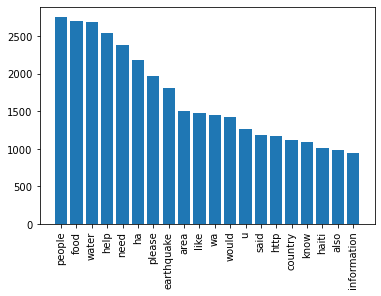

In [38]:
lemmas, counts = zip(*all_counts.most_common(20))
lemmas = [i[0] for i in lemmas]
plt.plot()
plt.xticks(rotation='vertical')
plt.bar(lemmas, counts)
plt.show()